# **DESAFIO FINAL: IMERSÃO DADOS 2 ALURA**

In [43]:
#Bibliotecas utilizadas
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np

plt.style.use('seaborn')

In [44]:
#Diretório
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Tabela Geral e Informações**

In [45]:
#Importa o DataFrame já restrito aos dados de Santos-SP
dados = pd.read_csv("/content/drive/My Drive/dfEnemSantos.csv")

In [46]:
#@title Amostra do DataFrame
dados.head()

,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,...,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,85887,190001090516,2019,3548500,Santos,35,SP,15,F,1,3,1,1200401.0,Rio Branco,12.0,AC,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,AEDCBBEAABDDABACDBACBEECBADBCDCDBAEEBCDDABCCE,AEDBA99999ABEABDEACECECCDCADAEDECBDECDAABDAAEA...,BABDABAADDBDABCECDEEAAACDCBCCAAEEDECDEAADECBE,0,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,140.0,120.0,120.0,100.0,80.0,560.0,E,G,B,D,4,N,A,B,C,A,A,B,A,B,A,A,A,A,B,B,A,D,B,B,B
1,201966,190001206599,2019,3548500,Santos,35,SP,29,F,1,3,1,2103000.0,Caxias,21.0,MA,1,9,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,AEBCDDDABDADDBDAEBABBACAEADDEBCECACDACEACBDAB,99999DACBEEABCABDBAECEEDBEACEAEADADCCAEEBCBACE...,AAAAAACBBEEEDBCDBACEDBBDACBDDCEACBEACBDBDBAAA,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,120.0,120.0,100.0,100.0,80.0,520.0,E,E,B,B,3,F,A,B,C,B,A,B,A,B,A,B,A,B,B,A,B,D,B,B,B
2,565382,190001570025,2019,3548500,Santos,35,SP,18,F,1,3,1,3548500.0,Santos,35.0,SP,2,0,2,1.0,0,35011940.0,3548500.0,Santos,35.0,SP,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,...,DBBEAEACABAAACBEAAECAEECBCEDBCAABDCBCEDDDECEE,AAADE99999BBAECCEDEBDAADEBACDEEEAABBECECACCBCE...,DACEBABCAEABCDDEEBAAAADAAAEDCCEBBBCDCDEACCEDB,0,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,160.0,120.0,160.0,120.0,120.0,680.0,D,C,C,B,5,D,A,C,D,B,A,B,B,B,A,B,A,A,B,B,A,E,B,A,B
3,565539,190001570182,2019,3548500,Santos,35,SP,18,F,1,3,1,3548500.0,Santos,35.0,SP,2,0,2,1.0,0,35011903.0,3548500.0,Santos,35.0,SP,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,E,F,F,5,E,A,C,E,B,A,B,B,B,B,B,A,A,C,B,B,C,B,B,B
4,566936,190001571579,2019,3548500,Santos,35,SP,18,F,1,3,1,3548500.0,Santos,35.0,SP,2,0,2,1.0,0,35011903.0,3548500.0,Santos,35.0,SP,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,...,CEECCACCACECDCAAEDCDCABDCBDEDAEBEBCDBCECCCECD,99999CDBEABACCCCAEEBEACDBADECECDDCEABAEAEEACDE...,ACBDCCDCABECBCEADBCAAEABACBEDDCB*C*A*BEBDACDE,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,120.0,120.0,100.0,80.0,120.0,540.0,H,A,F,B,4,C,A,B,B,A,A,B,A,B,A,B,A,A,B,A,A,C,A,A,A


In [47]:
#@title Informação sobre o tamanho do DataFrame
dados.shape

(7152, 137)

In [48]:
#@title Títulos das colunas presentes no DataFrame
dados.columns.values

array(['Unnamed: 0', 'NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'CO_MUNICIPIO_NASCIMENTO',
       'NO_MUNICIPIO_NASCIMENTO', 'CO_UF_NASCIMENTO', 'SG_UF_NASCIMENTO',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_ESCOLA', 'CO_MUNICIPIO_ESC',
       'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DEFICIENCIA_AUDITIVA', 'IN_SURDO_CEGUEIRA',
       'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_MENTAL',
       'IN_DEFICIT_ATENCAO', 'IN_DISLEXIA', 'IN_DISCALCULIA',
       'IN_AUTISMO', 'IN_VISAO_MONOCULAR', 'IN_OUTRA_DEF', 'IN_GESTANTE',
       'IN_LACTANTE', 'IN_IDOSO', 'IN_ESTUDA_CLASSE_HOSPITALAR',
       'IN_SEM_RECURSO', 'IN_BRAILLE', '

## **Variáveis e Funções**

In [49]:
# Organizando tabelas, adicionando nota total e removendo zerados
provas = ["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_MT", "NU_NOTA_LC", "NU_NOTA_REDACAO"]
dados["NU_NOTA_TOTAL"] = dados[provas].sum(axis = 1)
provas.append("NU_NOTA_TOTAL")
dados_sem_notas_zero = dados.query("NU_NOTA_TOTAL != 0")

#Ordenando variáveis qualitativas
renda_ordenada = dados["Q006"].unique()
renda_ordenada.sort()
escolaridade_ordenada = dados["Q001"].unique()
escolaridade_ordenada.sort()

#Separando os alunos por rede pública e privada
escolas_publicas_nan = dados_sem_notas_zero.query("TP_DEPENDENCIA_ADM_ESC != 4")
escolas_publicas = dados_sem_notas_zero.query("TP_DEPENDENCIA_ADM_ESC != 4").dropna()
escolas_privadas = dados_sem_notas_zero.query("TP_DEPENDENCIA_ADM_ESC == 4").dropna()

#Importando e preparando DataFrame com alunos especiais de todo o Brasil.
ENEM_brasil_especial = pd.read_csv("/content/drive/My Drive/ENEM_brasil_especial.csv")

# Organizando tabelas, adicionando nota total e removendo zerados
provas_especial = ["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_MT", "NU_NOTA_LC", "NU_NOTA_REDACAO"]
ENEM_brasil_especial["NU_NOTA_TOTAL"] = ENEM_brasil_especial[provas_especial].sum(axis = 1)
provas_especial.append("NU_NOTA_TOTAL")
ENEM_brasil_especial_sem_zero = ENEM_brasil_especial.query("NU_NOTA_TOTAL != 0")

#Importando amostra Brasil usada em aula
amostra_brasil = pd.read_csv("https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true")
provas_amostra = ["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_MT", "NU_NOTA_LC", "NU_NOTA_REDACAO"]
amostra_brasil["NU_NOTA_TOTAL"] = amostra_brasil[provas_amostra].sum(axis = 1)
provas_amostra.append("NU_NOTA_TOTAL")
amostra_brasil = amostra_brasil.query("NU_NOTA_TOTAL != 0")

#Média mediana e moda de alguns dados
media_total_amostra = float("{:.2f}".format(amostra_brasil["NU_NOTA_TOTAL"].mean()))
mediana_total_amostra = amostra_brasil["NU_NOTA_TOTAL"].median()
moda_total_amostra = amostra_brasil["NU_NOTA_TOTAL"].mode()[0]

media_total_especiais = float("{:.2f}".format(ENEM_brasil_especial_sem_zero["NU_NOTA_TOTAL"].mean()))
mediana_total_especiais = ENEM_brasil_especial_sem_zero["NU_NOTA_TOTAL"].median()
moda_total_especiais = ENEM_brasil_especial_sem_zero["NU_NOTA_TOTAL"].mode()[0]

#  **Análise de uma Medida de Melhoria do Ensino Público em Santos-SP pelo que Mostram os Dados do ENEM 2019**   <br>                                                 





O dia é 23 de Novembro de 2019. Santos inaugura uma novíssima e tecnológica escola voltada ao ensino infantil e fundamental. O edifíco de 4 pavimentos, contando com 22 salas de aula com ar-condicionado, espaço multimídia com 60 lugares (com tratamento acústico), parque sonoro, horta, lousas de vidro em todas as classes, fraldários nos berçários I e II, salas de berçário e maternal com banheiros interligados, cabeamento de fibra ótica, câmeras de monitoramento, além de captação de energia solar e sistema de reconhecimento facial para acesso e controle de frequência dos alunos. Tudo isso em uma região conhecida por ser esquecida pelas autoridades e largada a sua prórpia sorte. <br>
![img](https://www.santos.sp.gov.br/static/files_www/styles/full/public/field/image/ume_2.jpg?itok=RtIq9NxG)

O projeto fez sucesso, com pais que chegaram na tarde de domingo para estar na frente quando as matrículas abrissem na Segunda-Feira. Aqui iremos analisar como os indicadores fornecidos pelo ENEM podem reforçar ou questionar as escolhas feitas pela prefeitura em todo o projeto desta escola. Será que essa animação vale a pena?

## **A Necessidade de Ensino Público de Qualidade**

Seria estranho começar a falar sobre o projeto de uma escola pública sem antes levar alguns momentos citando a necessidade da população de baixa renda pelo ensino público. <br>
Não é segredo para nenhum dos brasileiros que em nosso país estamos em falta nesse quesito. O gráfico abaixo mostra a performance dos participantes do ENEM de Santos dividida por escolas municipais, estaduais e privadas. A escola federal apresentada no gráfico na verdade se encontra no município ao lado.

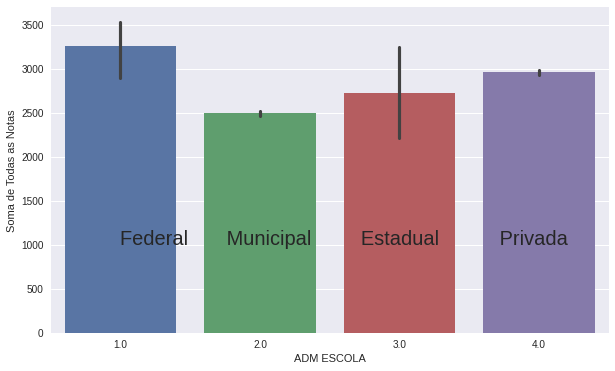

In [50]:
#@title
plt.figure(figsize=(10, 6))
sns.barplot(x="TP_DEPENDENCIA_ADM_ESC", y="NU_NOTA_TOTAL", data = dados_sem_notas_zero)
plt.xlabel("ADM ESCOLA")
plt.ylabel("Soma de Todas as Notas")
plt.annotate("Federal       Municipal         Estadual           Privada", xy = (0, 1000), fontsize='20')

plt.show()

Como fica claro, ainda há uma diferença considerável entre as notas dos alunos de escolas municipais e privadas.

Além da necessidade de unidades de ensino público de qualidade na cidade, a localização também é importante, pois a população a quem se destina esse empreendimento, em geral, não possui meio de transporte próprio.

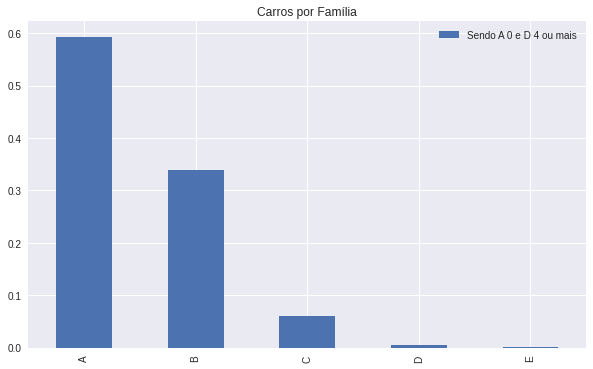

In [51]:
#@title
carro = dados.query("TP_PRESENCA_MT == 0 and TP_PRESENCA_LC == 0")["Q010"].value_counts(normalize=True)
plt.figure(figsize=(10, 6))
carro.plot.bar().set_title("Carros por Família")
plt.legend(['Sendo A 0 e D 4 ou mais'])


plt.show()

Isso é importante porque a evasão escolar é um dos grandes problemas que o ensino público enfrenta. Falaremos a respeito mais a frente.

## **Infraestrutura da Unidade**

Como mencionado, a U.M.E. possui uma estrutura de dar inveja a muitas escolas particulares. Vamos analisar alguns pontos dessa estrutura e como eles são relacionado a performance do alunos.

### **Acessibilidade e Inclusão**

Se falamos da acessibilidade da escola quanto ao estar próxima da casa das pessoas, precisamos falar outra vez agora que tratamos de portadores de necessidades especiais.  A prefeitura em acordo com a Companhia de Engenharia de tráfego instalou um ponto de ônibus em frente a escola e refez as calçadas para serem acessíveis a deficientes visuais e cadeirantes. Vamos ver nos números do ENEM no Brasil as dificuldades que essas pessoas enfrentam.

In [52]:
#@title

print("Número de portadores de necessidades especiais inscritos no ENEM:")
print(len(ENEM_brasil_especial))
print("Número dos acima que não compareceram a nenhum dia de provas:")
print(len(ENEM_brasil_especial.query("TP_PRESENCA_MT == 0 and TP_PRESENCA_LC ==0")))

plt.show()

Número de portadores de necessidades especiais inscritos no ENEM:
23096
Número dos acima que não compareceram a nenhum dia de provas:
4413


Desses, aproximadamente 58% não possuem carro, levando em conta o gráfico da outra seção, ou seja 2560 pessoas dependeram do transporte público para chegar ao local de prova e não conseguiram. Ponto para as reformas viárias no entorno da escola.

Mas então mesmo os que chegam, quantos desses será que passam dificuldades depois que chegam ao local? No fim, eles conseguem performar junto aqueles que não tem necessidades especiais?

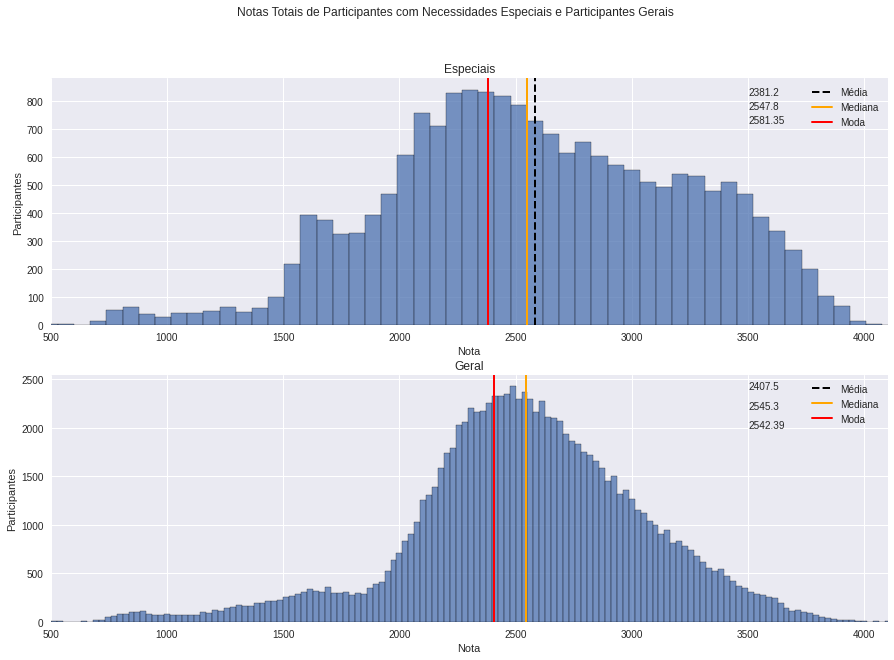

In [53]:
#@title
plt.figure(figsize=(15,10))
plt.suptitle("Notas Totais de Participantes com Necessidades Especiais e Participantes Gerais")

plt.subplot(2,1,1)
sns.histplot(ENEM_brasil_especial_sem_zero, x = "NU_NOTA_TOTAL")
plt.axvline(ENEM_brasil_especial_sem_zero["NU_NOTA_TOTAL"].mean(), color='black', linestyle='dashed', linewidth=2)
plt.axvline(ENEM_brasil_especial_sem_zero["NU_NOTA_TOTAL"].median(), color='orange', linewidth=2)
plt.axvline(ENEM_brasil_especial_sem_zero["NU_NOTA_TOTAL"].mode()[0], color='red', linewidth=2)
plt.ylabel("Participantes")
plt.xlabel("Nota")
plt.legend(['Média', 'Mediana', 'Moda'])
plt.title("Especiais")
plt.xlim(500, 4100)
plt.annotate(moda_total_especiais, xy=(3500, 820))
plt.annotate(mediana_total_especiais, xy=(3500, 770))
plt.annotate(media_total_especiais, xy=(3500, 720))

plt.subplot(2,1,2)
sns.histplot(amostra_brasil, x = "NU_NOTA_TOTAL")
plt.axvline(amostra_brasil["NU_NOTA_TOTAL"].mean(), color='black', linestyle='dashed', linewidth=2)
plt.axvline(amostra_brasil["NU_NOTA_TOTAL"].median(), color='orange', linewidth=2)
plt.axvline(amostra_brasil["NU_NOTA_TOTAL"].mode()[0], color='red', linewidth=2)
plt.ylabel("Participantes")
plt.xlabel("Nota")
plt.legend(['Média', 'Mediana', 'Moda'])
plt.title("Geral")
plt.xlim(500, 4100)
plt.annotate(moda_total_amostra, xy=(3500, 2400))
plt.annotate(mediana_total_amostra, xy=(3500, 2200))
plt.annotate(media_total_amostra, xy=(3500, 2000))



plt.show()

O histograma mostra que SIM! Os participantes com necessidades especiais tem plena capacidade de performar como os outros. Me chama a atenção porém que a distruibuição de notas dos especiais parece estar mais balanceada através do gráfico enquanto no geral os participantes se concentram mais em um ponto. Um outro gráfico pode mostrar isso melhor.

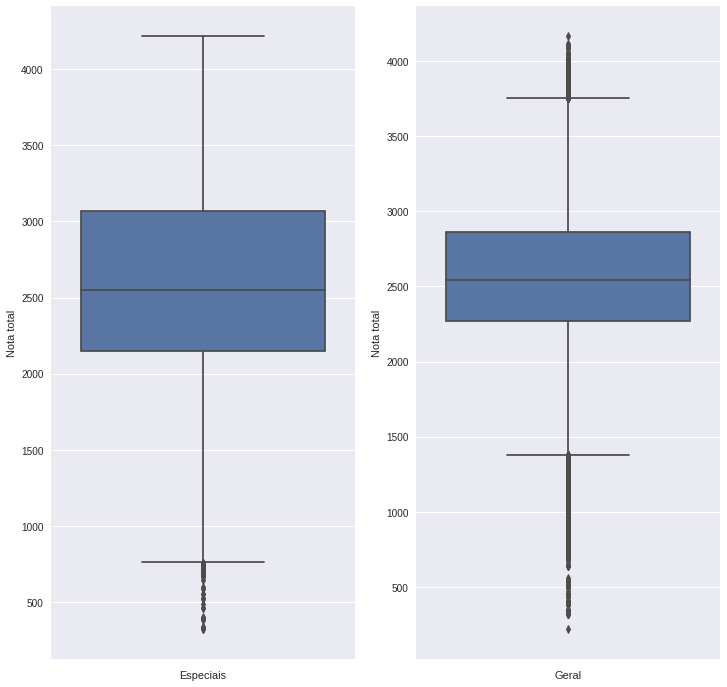

In [54]:
#@title
plt.figure(figsize=(12, 12))
plt.subplot(1,2,1)
graph = sns.boxplot(y = "NU_NOTA_TOTAL", data = ENEM_brasil_especial_sem_zero)
plt.ylabel("Nota total")
plt.xlabel("Especiais")

plt.subplot(1,2,2)
graph = sns.boxplot(y = "NU_NOTA_TOTAL", data = amostra_brasil)
plt.ylabel("Nota total")
plt.xlabel("Geral")

plt.show()

Reforçando a análise. Os participantes com necessidades especiais estão mais espalhados pelas possíveis notas, apesar de sua média, moda e mediana serem praticamente iguais aos dos participantes gerais. Isso me faz pensar que existem lugares no Brasil que estão cuidando bem de seus cidadãos com necessidades especiais, e outros que estão deixando a desajar. Cabe aí uma análise maior, olhando por localidade como os participantes performam.

Quanto a iniciativa da escola acessível, totalmente apoiada pelos dados do ENEM! Todas as cidades do Brasil deveriam ter um centro de ensino onde os portadores de necessidade especial possam se desevolver como o resto da população. Rampas de acesso, elevadores e outros equipamentos como a biblioteca acessível e sala de integração sensorial foram grandes adições para a comunidade de Santos.

### **Cabeamento em Fibra-Ótica e Wi-Fi Aberto**

Para maioria de nós a internet é algo tão presente no dia a dia que é impossível pensar que alguém viva nos dias de hoje sem tê-la presente consigo. Infelizmente não é isso que os dados mostram e muitas pessoas ainda não tem acesso a ela. Gigantes da tecnologia já se manifestaram em prol de buscar uma maneira de levar internet gratuita a todos os cantos do mundo. No caso de uma escola, o que muda ao se ter um bom e livre acesso à internet?

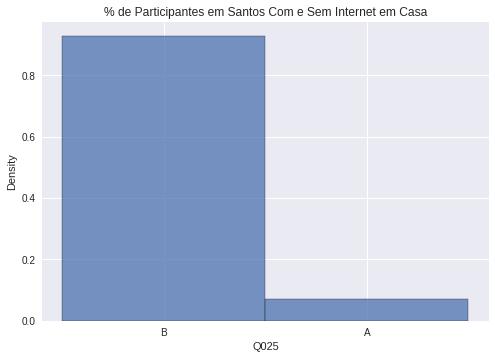

In [55]:
#@title
sns.histplot(dados["Q025"], stat="density")
plt.title("% de Participantes em Santos Com e Sem Internet em Casa")

plt.show()

Podemos ver acima que menos de 10% dos participantes inscritos não possuem acesso a internet em casa. Será que esse número gera algum impacto no desempenho geral?

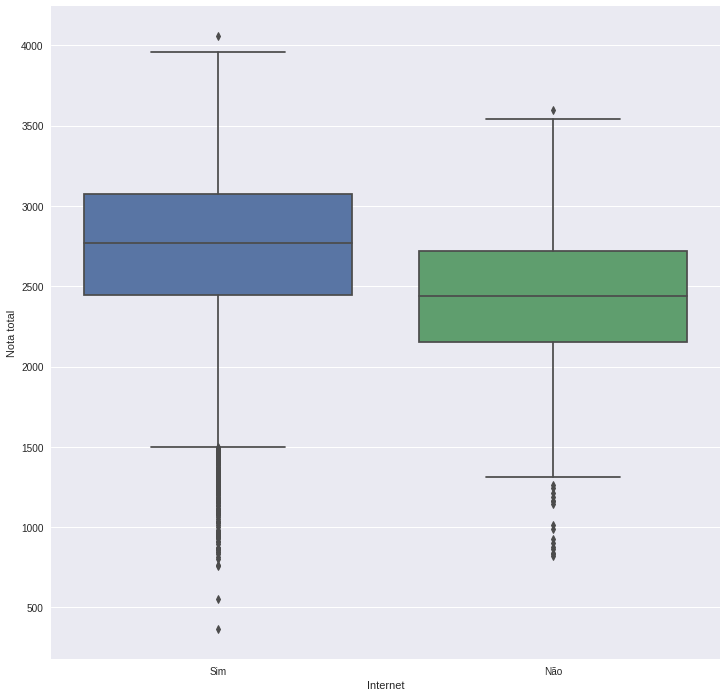

In [56]:
#@title
plt.figure(figsize=(12, 12))
graph = sns.boxplot(x="Q025", y = "NU_NOTA_TOTAL", data = dados_sem_notas_zero)
plt.ylabel("Nota total")
plt.xlabel("Internet")
graph.set_xticklabels(["Sim", "Não"])

plt.show()

Aqui aparece bem claro que os participantes sem internet não performoram tão bem quanto os que tinham internet. Fica mais claro a importância do acesso grátis a internet quando analisamos a causa das notas sem internet serem menores, ou melhor, de onde vem essas notas menores.

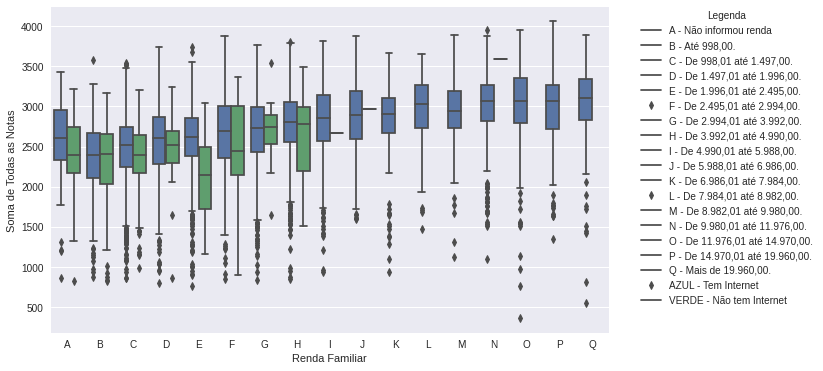

In [57]:
#@title
plt.figure(figsize=(10, 6))
sns.boxplot(x="Q006", y="NU_NOTA_TOTAL", hue="Q025", data = dados_sem_notas_zero, order = renda_ordenada)
plt.xlabel("Renda Familiar")
plt.ylabel("Soma de Todas as Notas")
plt.legend(labels =
           ['A - Não informou renda',
            'B - Até 998,00.',
            'C - De 998,01 até 1.497,00.',
            'D - De 1.497,01 até 1.996,00.',
            'E - De 1.996,01 até 2.495,00.',
            'F - De 2.495,01 até 2.994,00.',
            'G - De 2.994,01 até 3.992,00.',
            'H - De 3.992,01 até 4.990,00.',
            'I - De 4.990,01 até 5.988,00.',
            'J - De 5.988,01 até 6.986,00.',
            'K - De 6.986,01 até 7.984,00.',
            'L - De 7.984,01 até 8.982,00.',
            'M - De 8.982,01 até 9.980,00.',
            'N - De 9.980,01 até 11.976,00.',
            'O - De 11.976,01 até 14.970,00.',
            'P - De 14.970,01 até 19.960,00.',
            'Q - Mais de 19.960,00.',
            'AZUL - Tem Internet',
            'VERDE - Não tem Internet'],
            bbox_to_anchor=(1.05, 1), borderaxespad=0., title='Legenda')

plt.show()

Importantíssimo o acesso a internet para essas pessoas que não tem acesso em casa. Mais ainda, aprender na escola como utilizar a internet para seu desenvolvimento intelectual e pessoal, e não apenas como meio de comunicação com amigos. Nenhum lugar melhor que a escola para incentivar esse tipo de uso.

### **Reconhecimento Facial para Controle de Presença**

Prometi que falariamos da evasão, e o projeto também prevê algo para esse problema. Atualmente, há pouco mais de 10 milhões de jovens entre 15 e 17 anos.O ex ministro da educação Ricardo Velez, em abril de 2019, comentou:  "Nem todos os 8,8 milhões, dessa faixa etária, que se matriculam, permanecem na escola até o final. Cerca de 7% do total desses jovens abandonam a escola durante o ano letivo. ”

Quanto a isso o projeto provê o uso de um sistema moderno: <br>
O sistema de monitoramento de câmeras com reconhecimento facial para estudantes, funcionários e visitantes, que estará ligado diretamente ao sistema de inteligência da Prefeitura, para oferecer maior segurança aos alunos. “O sistema também trará segurança aos pais, que receberão um SMS caso o estudante falte”, destacou a secretária de Educação, Cristina Barletta. 

Essa ferramenta também é uma meneira de integrar os pais na educação do jovem. Um grande problema do ensino público é que nessas famílias de baixa renda a falta de escolaridade costuma ser hereditária, e isso reflete na performance dos alunos.

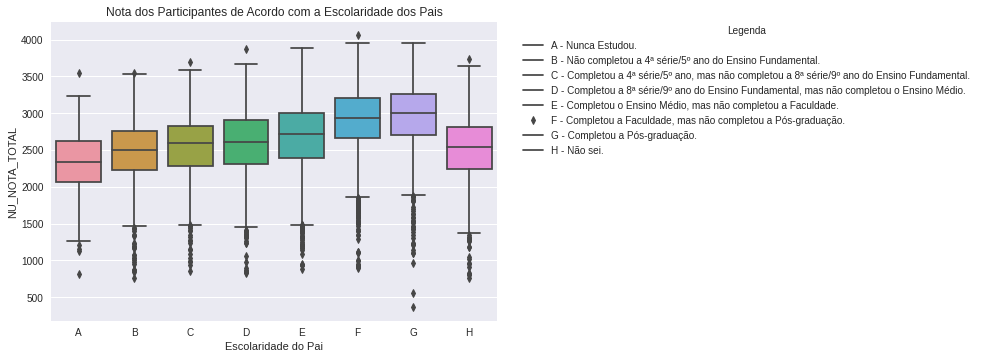

In [58]:
#@title
sns.boxplot(x = dados_sem_notas_zero["Q001"].sort_values(), y = "NU_NOTA_TOTAL", data = dados_sem_notas_zero)
plt.title("Nota dos Participantes de Acordo com a Escolaridade dos Pais")
plt.xlabel("Escolaridade do Pai")
plt.legend(labels =
           ['A - Nunca Estudou.',
            'B - Não completou a 4ª série/5º ano do Ensino Fundamental.',
            'C - Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.',
            'D - Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.',
            'E - Completou o Ensino Médio, mas não completou a Faculdade.',
            'F - Completou a Faculdade, mas não completou a Pós-graduação.',
            'G - Completou a Pós-graduação.',
            'H - Não sei.'], bbox_to_anchor=(1.05, 1), borderaxespad=0., title='Legenda')

plt.show()

Se o sistema realmente for eficaz em melhorar a participação dos pais no processo de educação do jovem, será inovador e extramamente útil a sociedade. Caso contrário, uma maneira caríssima de atualizar a lista de presença.

## **Conclusão**

A escola tem abordagens interessantes para alguns dos problemas que se propõe a resolver. Não é, porém, capaz de modificar uma cultura sozinha, embora caminhe corretamente em tentar melhorar pontos específicos da sociedade que precisam de atenção há tempos. Não será sozinha responsável por colocar o ensino público no mesmo patamar do privado - embora sua estrutura possa ser muito melhor que de grande parte das privadas - os dados sugerem que esse problema não envolverá apenas uma geração em sua resolução. <br>
Há muitas outras anáises que podem ser aprofundadas ao tocar-se nesse assunto. Falamos em termos gerais e usamos os pais, masculino, como exemplo na evasão, quando utilizar as mães traria toda uma outra gama de causas e consequências para a equação. Simplificamos para focar no projeto, e não no problema. E o projeto mostra-se promissor, digno de verificar-se com ansiedade seus resultados dentro de alguns anos. <br>
Convido todos que se sentirem inspirados por essa análise para se aprofundar no tema e adicionar sua voz entre aquelas que lutam para melhorar a educação no Brasil.